In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df=pd.read_csv('tfg_por numero de accidentes-Copy1.csv')

In [3]:
df

,Time segment,Holiday,Weekend Exit,Season,Weekend Return,Number accidents
0,6-10,Yes,Yes,Winter,Yes,0.0
1,6-10,Yes,Yes,Winter,No,0.0
2,6-10,Yes,Yes,Spring,Yes,0.0
3,6-10,Yes,Yes,Spring,No,2.0
4,6-10,Yes,Yes,Summer,Yes,0.0
...,...,...,...,...,...,...
187,2-6,No,No,Spring,No,24.0
188,2-6,No,No,Summer,Yes,0.0
189,2-6,No,No,Summer,No,34.0
190,2-6,No,No,Fall,Yes,0.0


In [11]:
# Suponiendo que 'Number' es el nombre de la columna en tu DataFrame df y 161 es el umbral
umbral = 3
df['Exceeds Threshold'] = df['Number accidents'].apply(lambda x: 'Yes' if x >= umbral else 'No')

In [12]:
df

,Time segment,Holiday,Weekend Exit,Season,Weekend Return,Number accidents,Exceeds Threshold
0,6-10,Yes,Yes,Winter,Yes,0.0,No
1,6-10,Yes,Yes,Winter,No,0.0,No
2,6-10,Yes,Yes,Spring,Yes,0.0,No
3,6-10,Yes,Yes,Spring,No,2.0,No
4,6-10,Yes,Yes,Summer,Yes,0.0,No
...,...,...,...,...,...,...,...
187,2-6,No,No,Spring,No,24.0,Yes
188,2-6,No,No,Summer,Yes,0.0,No
189,2-6,No,No,Summer,No,34.0,Yes
190,2-6,No,No,Fall,Yes,0.0,No


In [13]:
df['Exceeds Threshold'].value_counts()

Yes    101
No      91
Name: Exceeds Threshold, dtype: int64

In [14]:
df2 = df.drop('Number accidents', axis=1)

In [15]:
df2

,Time segment,Holiday,Weekend Exit,Season,Weekend Return,Exceeds Threshold
0,6-10,Yes,Yes,Winter,Yes,No
1,6-10,Yes,Yes,Winter,No,No
2,6-10,Yes,Yes,Spring,Yes,No
3,6-10,Yes,Yes,Spring,No,No
4,6-10,Yes,Yes,Summer,Yes,No
...,...,...,...,...,...,...
187,2-6,No,No,Spring,No,Yes
188,2-6,No,No,Summer,Yes,No
189,2-6,No,No,Summer,No,Yes
190,2-6,No,No,Fall,Yes,No


In [16]:
X = df[['Time segment', 'Holiday', 'Weekend Exit', 'Season', 'Weekend Return']]
y=df['Exceeds Threshold']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
# Suponiendo que deseas mapear 'Yes' a 1 y 'No' a 0 en la columna 'Exceeds Threshold'
mapeo = {'Yes': 1, 'No': 0}
df['Exceeds Threshold'] = df['Exceeds Threshold'].map(mapeo)
df['Weekend Exit'] = df['Weekend Exit'].map(mapeo)
df['Holiday'] = df['Holiday'].map(mapeo)
df['Weekend Return'] = df['Weekend Return'].map(mapeo)
mapi= {'6-10': 0, '10-14': 1, '14-18': 2, '18-22': 3, '22-2': 4, '2-6': 5}
df['Time segment'] = df['Time segment'].map(mapi)
mapis= {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}
df['Season'] = df['Season'].map(mapis)

In [19]:
X = df[['Time segment', 'Holiday', 'Weekend Exit', 'Season', 'Weekend Return']]
y=df['Exceeds Threshold']

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

Model accuracy score with criterion entropy: 0.9688


[Text(0.5, 0.875, 'x[4] <= 0.5\nentropy = 0.996\nsamples = 128\nvalue = [59, 69]'),
 Text(0.2, 0.625, 'x[1] <= 0.5\nentropy = 0.637\nsamples = 62\nvalue = [10, 52]'),
 Text(0.1, 0.375, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.3, 0.375, 'x[2] <= 0.5\nentropy = 0.951\nsamples = 27\nvalue = [10, 17]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.4, 0.125, 'entropy = 0.779\nsamples = 13\nvalue = [10, 3]'),
 Text(0.8, 0.625, 'x[2] <= 0.5\nentropy = 0.823\nsamples = 66\nvalue = [49, 17]'),
 Text(0.7, 0.375, 'x[1] <= 0.5\nentropy = 0.993\nsamples = 31\nvalue = [14, 17]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.9, 0.375, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0]')]

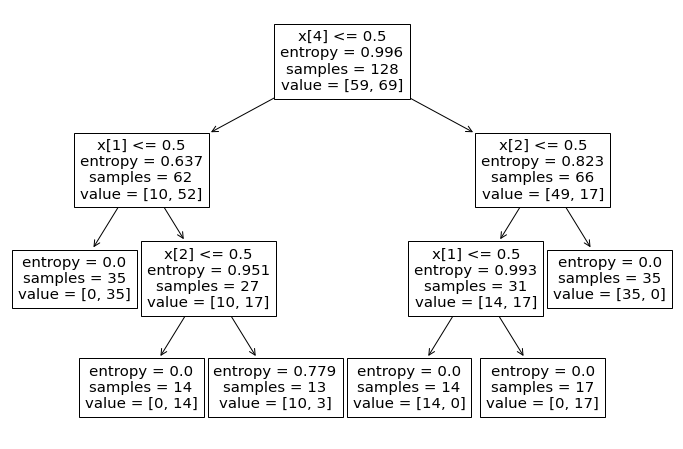

In [21]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)


In [23]:
cm

array([[32,  0],
       [ 2, 30]], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_en)
print(conf_matrix)


[[32  0]
 [ 2 30]]


Feature Importance: [0.         0.38048435 0.33311967 0.         0.28639597]


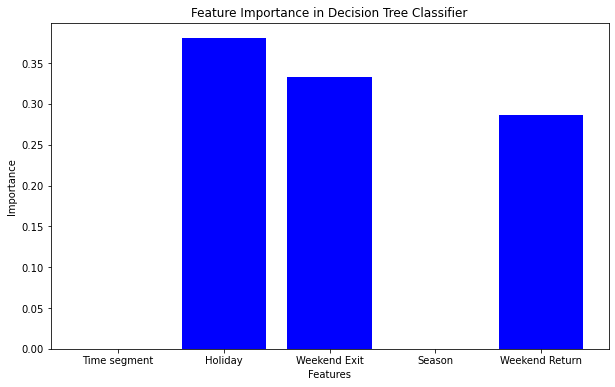

In [26]:
import matplotlib.pyplot as plt
feature_importance = clf_en.feature_importances_
print("Feature Importance:", feature_importance)
feature_names = X.columns  # Obtén los nombres de las características desde tus datos

# Crea un gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()


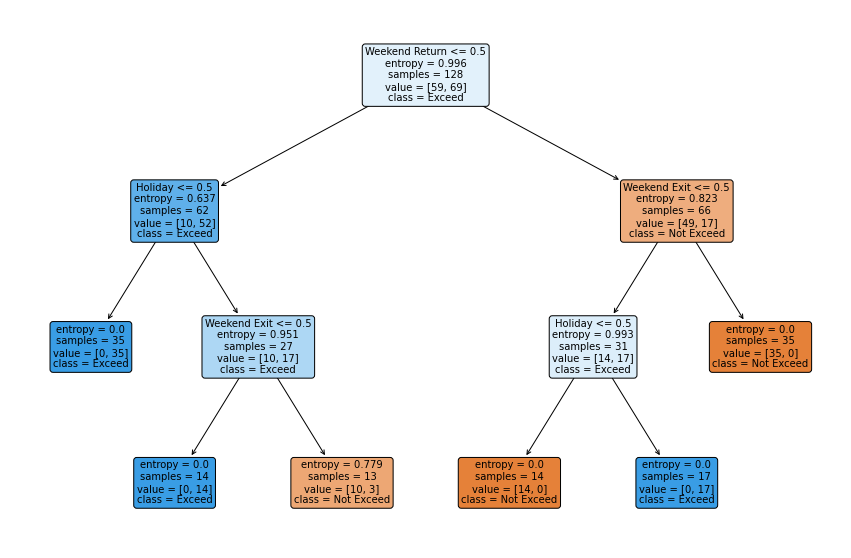

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configura el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Visualiza el árbol
plot_tree(clf_en, feature_names=X.columns, class_names=['Not Exceed', 'Exceed'], filled=True, rounded=True, fontsize=10)

# Muestra el gráfico
plt.show()

In [28]:
from sklearn.metrics import gini_score, recall_score

# Supongamos que 'y_true' son las etiquetas reales y 'y_pred' son las predicciones del modelo
# y_true = ...
# y_pred = ...

# Calcular el índice Gini
gini = gini_score(y_true, y_pred)
print(f'Índice Gini: {gini}')

# Calcular la sensibilidad (recall)
recall = recall_score(y_true, y_pred)
print(f'Sensibilidad (Recall): {recall}')


ImportError: cannot import name 'gini_score' from 'sklearn.metrics' (C:\Users\julsd\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import tree

# Crear y entrenar el modelo de árbol de decisiones
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular el índice Gini (área bajo la curva ROC)
gini = roc_auc_score(y_test, y_pred)

# Calcular la sensibilidad (recall)
recall = recall_score(y_test, y_pred)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir métricas de rendimiento
print(f'Model Accuracy: {accuracy:.4f}')
print(f'Índice Gini: {gini:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print


Model Accuracy: 0.9375
Índice Gini: 0.9375
Sensibilidad (Recall): 0.9688


<function print>